In [17]:
import sys, os
import numpy as np
sys.path.append('src/')
import torch
from MolGraphNetwork import MolGraphNetwork
from scf_guess_tools import Backend

BASIS_PATH = "/home/etschgi1/REPOS/Masterarbeit/scripts/6-31g_2df_p_custom_nwchem.gbs"
GEOMETRY_Source = "/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MGNN = MolGraphNetwork(xyz_source=GEOMETRY_Source,
                       basis=BASIS_PATH,
                       backend=Backend.PY,
                       batch_size=2,
                       train_val_test_ratio=(0.8, 0.1, 0.1), 
                       message_passing_steps=5,
                       edge_threshold_val=5,
                       message_net_layers=5,
                       message_net_dropout=0.1,
                       target="fock",
                       verbose_level=2)
MGNN.load_data(max_samples=500,
               cache_meta = {"method":"dft", "basis":None, "functional": "b3lypg", "guess": "minao", "backend": "pyscf", "cache": "/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/out/c7h10o2_b3lypg_6-31G(2df,p)/pyscf"})

Setting verbose level to: 2
Loading 6095 files from /home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted...
Limiting to 500 samples out of 6095 total files.


Loading files: 100%|██████████| 500/500 [00:00<00:00, 945.46it/s] 
Creating graphs: 500it [00:08, 61.34it/s]


Total samples: 500, Train: 400, Val: 50, Test: 50
Found 3 center keys (['C', 'H', 'O']) and 6 edge keys (['C_C', 'C_H', 'C_O', 'H_H', 'H_O', 'O_O']) in the training set. -> Totaling 9 unique encoder/decoder.
Normalization factors computed and applied.
Center stats: {'C': (0.08876161012622669, 0.2718006012560008), 'H': (0.3772194703420003, 0.4689655636092979), 'O': (0.08879295911475421, 0.27185695530549353)}, Edge stats: {'C_C': (0.0008463309857415035, 0.057830478500747705), 'C_H': (0.0025379841484101653, 0.05653442009867644), 'C_O': (0.000286443963509968, 0.03872239186405743), 'H_H': (0.00571588151640885, 0.036311602871046525), 'H_O': (0.004334431630765828, 0.06920269711061201), 'O_O': (-0.00042118067444802976, 0.09066468787597039)}
First train batch: 38 atoms, 662 edges, 38 center blocks.
Found center block size 351 for atom type O.
Found center block size 351 for atom type C.
Found center block size 15 for atom type H.
Found edge block size 676 for edge type O_O.
Found edge block siz

In [18]:
RETRAIN = True
if not RETRAIN and os.path.exists("/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_simple.pth"):
    MGNN.load_model("/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_simple.pth")
else:
    MGNN.train_model(num_epochs=50, lr=1e-4, weight_decay=1e-5, model_save_path="/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_simple.pth")
    MGNN.save_model("/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_simple.pth")

Epoch 1 [Train]: 100%|██████████| 200/200 [00:48<00:00,  4.09it/s]


Epoch 1/50 → Avg Train Loss: 153.573693


Epoch 1 [Val]: 100%|██████████| 25/25 [00:00<00:00, 31.32it/s]


Epoch 1/50 → Avg Val   Loss: 78.910313


Epoch 2 [Train]: 100%|██████████| 200/200 [00:46<00:00,  4.30it/s]


Epoch 2/50 → Avg Train Loss: 62.434953


Epoch 2 [Val]: 100%|██████████| 25/25 [00:00<00:00, 28.81it/s]


Epoch 2/50 → Avg Val   Loss: 51.821947


Epoch 3 [Train]: 100%|██████████| 200/200 [00:47<00:00,  4.22it/s]


Epoch 3/50 → Avg Train Loss: 41.944457


Epoch 3 [Val]: 100%|██████████| 25/25 [00:00<00:00, 28.23it/s]


Epoch 3/50 → Avg Val   Loss: 35.546682


Epoch 4 [Train]: 100%|██████████| 200/200 [00:49<00:00,  4.01it/s]


Epoch 4/50 → Avg Train Loss: 29.836149


Epoch 4 [Val]: 100%|██████████| 25/25 [00:00<00:00, 30.61it/s]


Epoch 4/50 → Avg Val   Loss: 26.908398


Epoch 5 [Train]: 100%|██████████| 200/200 [00:49<00:00,  4.07it/s]


Epoch 5/50 → Avg Train Loss: 23.911918


Epoch 5 [Val]: 100%|██████████| 25/25 [00:00<00:00, 26.77it/s]


Epoch 5/50 → Avg Val   Loss: 22.969345


Epoch 6 [Train]: 100%|██████████| 200/200 [00:51<00:00,  3.91it/s]


Epoch 6/50 → Avg Train Loss: 20.931694


Epoch 6 [Val]: 100%|██████████| 25/25 [00:00<00:00, 28.11it/s]


Epoch 6/50 → Avg Val   Loss: 20.678531


Epoch 7 [Train]: 100%|██████████| 200/200 [00:52<00:00,  3.83it/s]


Epoch 7/50 → Avg Train Loss: 18.907990


Epoch 7 [Val]: 100%|██████████| 25/25 [00:00<00:00, 27.09it/s]


Epoch 7/50 → Avg Val   Loss: 18.907159


Epoch 8 [Train]: 100%|██████████| 200/200 [00:50<00:00,  4.00it/s]


Epoch 8/50 → Avg Train Loss: 17.295742


Epoch 8 [Val]: 100%|██████████| 25/25 [00:00<00:00, 29.72it/s]


Epoch 8/50 → Avg Val   Loss: 17.454508


Epoch 9 [Train]: 100%|██████████| 200/200 [00:52<00:00,  3.82it/s]


Epoch 9/50 → Avg Train Loss: 15.967318


Epoch 9 [Val]: 100%|██████████| 25/25 [00:00<00:00, 27.99it/s]


Epoch 9/50 → Avg Val   Loss: 16.241242


Epoch 10 [Train]: 100%|██████████| 200/200 [00:52<00:00,  3.82it/s]


Epoch 10/50 → Avg Train Loss: 14.875959


Epoch 10 [Val]: 100%|██████████| 25/25 [00:00<00:00, 27.32it/s]


Epoch 10/50 → Avg Val   Loss: 15.237697


Epoch 11 [Train]: 100%|██████████| 200/200 [00:53<00:00,  3.76it/s]


Epoch 11/50 → Avg Train Loss: 13.980632


Epoch 11 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.78it/s]


Epoch 11/50 → Avg Val   Loss: 14.422897


Epoch 12 [Train]: 100%|██████████| 200/200 [00:53<00:00,  3.73it/s]


Epoch 12/50 → Avg Train Loss: 13.241667


Epoch 12 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.64it/s]


Epoch 12/50 → Avg Val   Loss: 13.739929


Epoch 13 [Train]: 100%|██████████| 200/200 [00:53<00:00,  3.74it/s]


Epoch 13/50 → Avg Train Loss: 12.632518


Epoch 13 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.08it/s]


Epoch 13/50 → Avg Val   Loss: 13.171422


Epoch 14 [Train]: 100%|██████████| 200/200 [00:53<00:00,  3.76it/s]


Epoch 14/50 → Avg Train Loss: 12.118984


Epoch 14 [Val]: 100%|██████████| 25/25 [00:00<00:00, 28.34it/s]


Epoch 14/50 → Avg Val   Loss: 12.721749


Epoch 15 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.66it/s]


Epoch 15/50 → Avg Train Loss: 11.685176


Epoch 15 [Val]: 100%|██████████| 25/25 [00:00<00:00, 26.03it/s]


Epoch 15/50 → Avg Val   Loss: 12.291222


Epoch 16 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.68it/s]


Epoch 16/50 → Avg Train Loss: 11.305279


Epoch 16 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.95it/s]


Epoch 16/50 → Avg Val   Loss: 11.934264


Epoch 17 [Train]: 100%|██████████| 200/200 [00:52<00:00,  3.78it/s]


Epoch 17/50 → Avg Train Loss: 10.972327


Epoch 17 [Val]: 100%|██████████| 25/25 [00:01<00:00, 19.49it/s]


Epoch 17/50 → Avg Val   Loss: 11.604192


Epoch 18 [Train]: 100%|██████████| 200/200 [00:53<00:00,  3.73it/s]


Epoch 18/50 → Avg Train Loss: 10.673566


Epoch 18 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.89it/s]


Epoch 18/50 → Avg Val   Loss: 11.303764


Epoch 19 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.68it/s]


Epoch 19/50 → Avg Train Loss: 10.376560


Epoch 19 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.87it/s]


Epoch 19/50 → Avg Val   Loss: 11.024539


Epoch 20 [Train]: 100%|██████████| 200/200 [00:53<00:00,  3.71it/s]


Epoch 20/50 → Avg Train Loss: 10.123862


Epoch 20 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.01it/s]


Epoch 20/50 → Avg Val   Loss: 10.823836


Epoch 21 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.65it/s]


Epoch 21/50 → Avg Train Loss: 9.900750


Epoch 21 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.85it/s]


Epoch 21/50 → Avg Val   Loss: 10.559215


Epoch 22 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]


Epoch 22/50 → Avg Train Loss: 9.683204


Epoch 22 [Val]: 100%|██████████| 25/25 [00:00<00:00, 26.76it/s]


Epoch 22/50 → Avg Val   Loss: 10.362429


Epoch 23 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.64it/s]


Epoch 23/50 → Avg Train Loss: 9.492534


Epoch 23 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.54it/s]


Epoch 23/50 → Avg Val   Loss: 10.149354


Epoch 24 [Train]: 100%|██████████| 200/200 [00:53<00:00,  3.76it/s]


Epoch 24/50 → Avg Train Loss: 9.314992


Epoch 24 [Val]: 100%|██████████| 25/25 [00:00<00:00, 27.59it/s]


Epoch 24/50 → Avg Val   Loss: 10.023699


Epoch 25 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.68it/s]


Epoch 25/50 → Avg Train Loss: 9.162130


Epoch 25 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.99it/s]


Epoch 25/50 → Avg Val   Loss: 9.822718


Epoch 26 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.67it/s]


Epoch 26/50 → Avg Train Loss: 9.006026


Epoch 26 [Val]: 100%|██████████| 25/25 [00:02<00:00, 12.28it/s]


Epoch 26/50 → Avg Val   Loss: 9.675405


Epoch 27 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.61it/s]


Epoch 27/50 → Avg Train Loss: 8.870417


Epoch 27 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.32it/s]


Epoch 27/50 → Avg Val   Loss: 9.541948


Epoch 28 [Train]: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]


Epoch 28/50 → Avg Train Loss: 8.747533


Epoch 28 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.82it/s]


Epoch 28/50 → Avg Val   Loss: 9.417779


Epoch 29 [Train]: 100%|██████████| 200/200 [00:56<00:00,  3.56it/s]


Epoch 29/50 → Avg Train Loss: 8.662349


Epoch 29 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.80it/s]


Epoch 29/50 → Avg Val   Loss: 9.330270


Epoch 30 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.67it/s]


Epoch 30/50 → Avg Train Loss: 8.536729


Epoch 30 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.82it/s]


Epoch 30/50 → Avg Val   Loss: 9.221352


Epoch 31 [Train]: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]


Epoch 31/50 → Avg Train Loss: 8.447770


Epoch 31 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.65it/s]


Epoch 31/50 → Avg Val   Loss: 9.125440


Epoch 32 [Train]: 100%|██████████| 200/200 [00:58<00:00,  3.45it/s]


Epoch 32/50 → Avg Train Loss: 8.369534


Epoch 32 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.43it/s]


Epoch 32/50 → Avg Val   Loss: 9.037577


Epoch 33 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.61it/s]


Epoch 33/50 → Avg Train Loss: 8.280940


Epoch 33 [Val]: 100%|██████████| 25/25 [00:02<00:00, 11.65it/s]


Epoch 33/50 → Avg Val   Loss: 8.965523


Epoch 34 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.63it/s]


Epoch 34/50 → Avg Train Loss: 8.204930


Epoch 34 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.42it/s]


Epoch 34/50 → Avg Val   Loss: 8.881665


Epoch 35 [Train]: 100%|██████████| 200/200 [00:56<00:00,  3.57it/s]


Epoch 35/50 → Avg Train Loss: 8.130591


Epoch 35 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.99it/s]


Epoch 35/50 → Avg Val   Loss: 8.822931


Epoch 36 [Train]: 100%|██████████| 200/200 [00:56<00:00,  3.52it/s]


Epoch 36/50 → Avg Train Loss: 8.068663


Epoch 36 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.39it/s]


Epoch 36/50 → Avg Val   Loss: 8.775961


Epoch 37 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]


Epoch 37/50 → Avg Train Loss: 8.007734


Epoch 37 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.40it/s]


Epoch 37/50 → Avg Val   Loss: 8.689879


Epoch 38 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.57it/s]


Epoch 38/50 → Avg Train Loss: 7.949144


Epoch 38 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.66it/s]


Epoch 38/50 → Avg Val   Loss: 8.628663


Epoch 39 [Train]: 100%|██████████| 200/200 [00:56<00:00,  3.54it/s]


Epoch 39/50 → Avg Train Loss: 7.893401


Epoch 39 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.45it/s]


Epoch 39/50 → Avg Val   Loss: 8.577037


Epoch 40 [Train]: 100%|██████████| 200/200 [00:57<00:00,  3.47it/s]


Epoch 40/50 → Avg Train Loss: 7.862687


Epoch 40 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.11it/s]


Epoch 40/50 → Avg Val   Loss: 8.569432


Epoch 41 [Train]: 100%|██████████| 200/200 [00:57<00:00,  3.48it/s]


Epoch 41/50 → Avg Train Loss: 7.813468


Epoch 41 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.89it/s]


Epoch 41/50 → Avg Val   Loss: 8.496273


Epoch 42 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.66it/s]


Epoch 42/50 → Avg Train Loss: 7.760903


Epoch 42 [Val]: 100%|██████████| 25/25 [00:02<00:00, 11.82it/s]


Epoch 42/50 → Avg Val   Loss: 8.448512


Epoch 43 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.63it/s]


Epoch 43/50 → Avg Train Loss: 7.706963


Epoch 43 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.67it/s]


Epoch 43/50 → Avg Val   Loss: 8.400411


Epoch 44 [Train]: 100%|██████████| 200/200 [00:56<00:00,  3.53it/s]


Epoch 44/50 → Avg Train Loss: 7.665057


Epoch 44 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.28it/s]


Epoch 44/50 → Avg Val   Loss: 8.359901


Epoch 45 [Train]: 100%|██████████| 200/200 [00:57<00:00,  3.49it/s]


Epoch 45/50 → Avg Train Loss: 7.624942


Epoch 45 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.28it/s]


Epoch 45/50 → Avg Val   Loss: 8.349687


Epoch 46 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.59it/s]


Epoch 46/50 → Avg Train Loss: 7.587098


Epoch 46 [Val]: 100%|██████████| 25/25 [00:01<00:00, 24.35it/s]


Epoch 46/50 → Avg Val   Loss: 8.291320


Epoch 47 [Train]: 100%|██████████| 200/200 [00:55<00:00,  3.58it/s]


Epoch 47/50 → Avg Train Loss: 7.549581


Epoch 47 [Val]: 100%|██████████| 25/25 [00:00<00:00, 26.52it/s]


Epoch 47/50 → Avg Val   Loss: 8.250630


Epoch 48 [Train]: 100%|██████████| 200/200 [00:57<00:00,  3.50it/s]


Epoch 48/50 → Avg Train Loss: 7.518077


Epoch 48 [Val]: 100%|██████████| 25/25 [00:00<00:00, 26.82it/s]


Epoch 48/50 → Avg Val   Loss: 8.237701


Epoch 49 [Train]: 100%|██████████| 200/200 [00:58<00:00,  3.44it/s]


Epoch 49/50 → Avg Train Loss: 7.484349


Epoch 49 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.15it/s]


Epoch 49/50 → Avg Val   Loss: 8.190241


Epoch 50 [Train]: 100%|██████████| 200/200 [00:54<00:00,  3.68it/s]


Epoch 50/50 → Avg Train Loss: 7.448844


Epoch 50 [Val]: 100%|██████████| 25/25 [00:00<00:00, 25.93it/s]


Epoch 50/50 → Avg Val   Loss: 8.161199


Epoch 50 [Test]: 100%|██████████| 25/25 [00:00<00:00, 28.27it/s]


Test  Loss: 7.703258
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_simple.pth
Model saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_simple.pth


In [19]:
load_model = MGNN.load_model("/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_simple.pth")

Loaded weights from /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_simple.pth (strict=True)


/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/src/MolGraphNetwork.py:772: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_locati

In [20]:
test_graphs = MGNN.get_graphs("test")

In [21]:
import matplotlib.pyplot as plt
def quick_imshow(matrix, title=None, vmax=1, threshold=1e-10, print_vals=False):
    matrix = matrix.numpy if hasattr(matrix, 'numpy') else matrix
    matrix = matrix.copy()
    matrix[np.abs(matrix) < threshold] = 0
    if print_vals:
        for (i, row) in enumerate(matrix):
            for (j, val) in enumerate(row):
                plt.text(j, i, f"{val:.2f}", ha="center", va="center", color="black", fontsize=8)
    plt.imshow(matrix, cmap='RdBu', vmin=-vmax, vmax=vmax)
    plt.colorbar()
    if title:
        plt.title(title)
    plt.show()
def summary(mat, title=None): 
    if title:
        print(title)
    print(f"Max: {np.max(mat)}")
    print(f"Min: {np.min(mat)}")
    print(f"Mean: {np.mean(mat)}")
    print(f"Std: {np.std(mat)}")
    print(f"Sum: {np.sum(mat)}")

In [22]:
predictions = MGNN.predict(test_graphs, inv_transform=True)

Ground Truth
Max: 5.005878489765173
Min: -19.148552195321827
Mean: -0.0007437877404676791
Std: 0.2127040695670715
Sum: -59.990943995161125
Prediction
Max: 4.962540149688721
Min: -19.138364791870117
Mean: -0.0004939570208080113
Std: 0.21113274991512299
Sum: -39.84059524536133


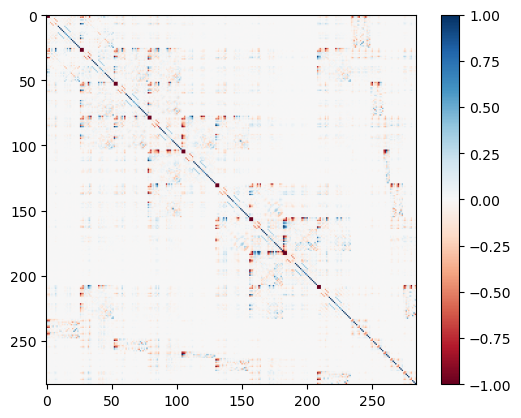

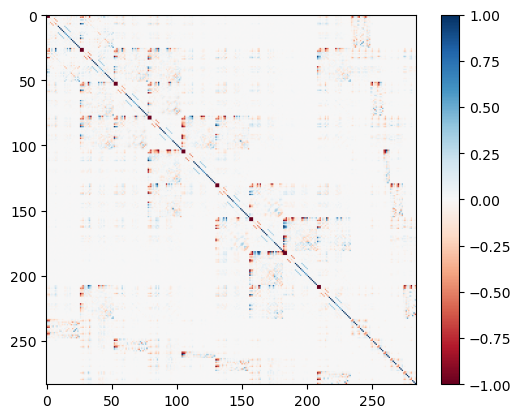

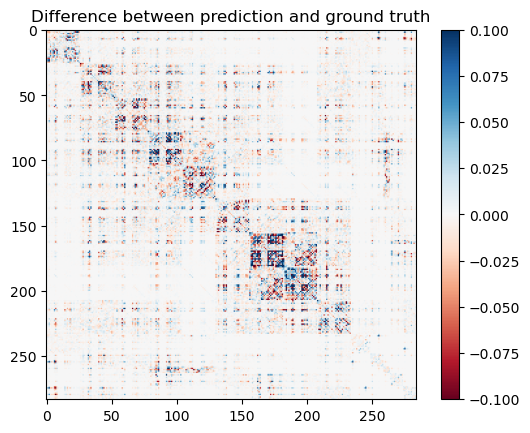

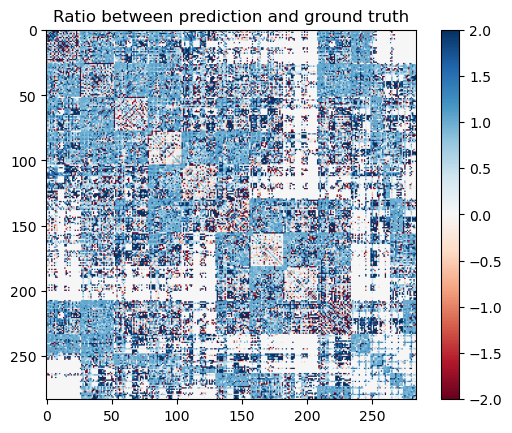

In [23]:
truth_0 = MGNN.get_ground_truth("test")[0]
pred_0 = predictions[0]
summary(truth_0, title="Ground Truth")
summary(pred_0, title="Prediction")
quick_imshow(truth_0)
quick_imshow(pred_0)
diff_0 = pred_0 - truth_0
quick_imshow(diff_0, title="Difference between prediction and ground truth", vmax=0.1, threshold=1e-4)
thres_mask = np.abs(truth_0) > 1e-4
ratio = np.zeros_like(truth_0)
ratio[thres_mask] = pred_0[thres_mask] / truth_0[thres_mask]
quick_imshow(ratio, title="Ratio between prediction and ground truth", vmax=2, threshold=1e-4)

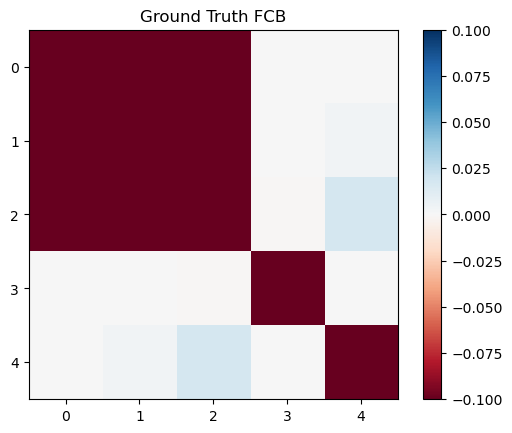

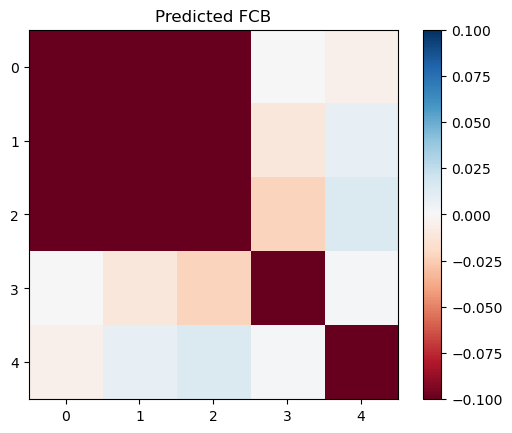

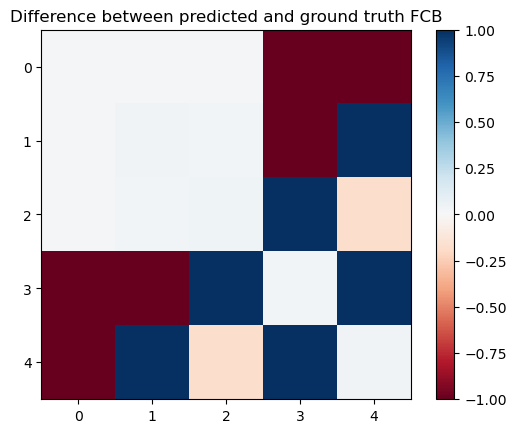

In [24]:
fcb = truth_0[:5,:5]
fcb_pred = pred_0[:5,:5]
quick_imshow(fcb, title="Ground Truth FCB", vmax=0.1, threshold=1e-4)
quick_imshow(fcb_pred, title="Predicted FCB", vmax=0.1, threshold=1e-4)
diff_fcb = fcb_pred - fcb
diff_perc = np.zeros_like(fcb)
diff_perc[fcb != 0] = diff_fcb[fcb != 0] / fcb[fcb != 0]
quick_imshow(diff_perc, title="Difference between predicted and ground truth FCB", vmax=1, threshold=1e-4)

# Test sim

In [36]:
from scf_guess_tools import load, calculate
from scipy.linalg import eigh
from pyscf import gto, scf


In [26]:
def check_positive_definite(S, tol=1e-10):
    eigvals = np.linalg.eigvalsh(S)
    is_pd = np.all(eigvals > tol)
    return is_pd
def density_from_fock(fock, overlap, nocc):
    assert check_positive_definite(overlap)
    _, C = eigh(fock, overlap)
    C_occ = C[:, :nocc]
    density = 2 * C_occ @ C_occ.T 
    return density

In [27]:
benchmark_file = MGNN.get_files("test")[0]
# sim for this file using pyscf and our settings!
mol = load(benchmark_file, basis=BASIS_PATH, backend=Backend.PY)
wf = calculate(mol, BASIS_PATH, None, "dft", "b3lypg")
fock_matrix = wf.fock()

Using basis from /home/etschgi1/REPOS/Masterarbeit/scripts/6-31g_2df_p_custom_nwchem.gbs
converged SCF energy = -423.197915514699


1028.6316796145982
2.0870968380662234


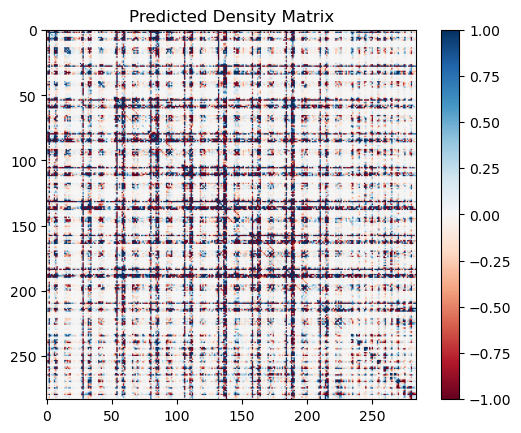

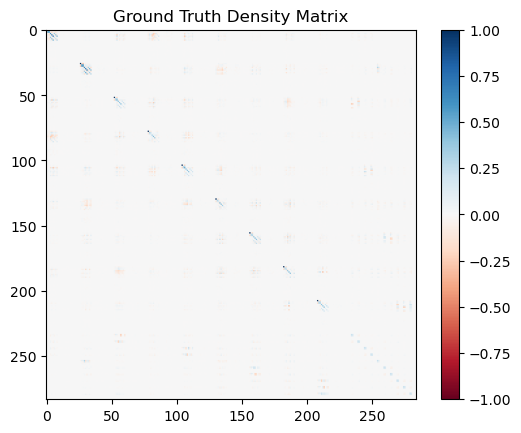

In [33]:
# density from fock pred
nn_fock_pred = predictions[0]
density_pred = density_from_fock(nn_fock_pred, wf.overlap().numpy, mol.native.nelectron // 2)
density_truth = density_from_fock(fock_matrix.numpy, wf.overlap().numpy, mol.native.nelectron // 2)
density_pred_clip = np.clip(density_pred, -2, 2)
print(density_pred.max())
print(density_truth.max())
quick_imshow(density_pred_clip, title="Predicted Density Matrix", vmax=1, threshold=1e-4)
quick_imshow(density_truth, title="Ground Truth Density Matrix", vmax=1, threshold=1e-4)


Ok so the sim gives practically the same as we have as our ground truth which is very good! 
So check why there is a discrepancy in our models prediction

In [37]:
mol_native = mol.native
mol_native.basis= BASIS_PATH
mol_native.build()

wf = scf.RKS(mol_native)
wf.xc = "b3lypg"
wf.kernel(dm0=density_pred_clip)




KeyboardInterrupt: 